# **K NEAREST NEIGHBORS (KNN)**

The KNN algorithm is a non-parametric method of classification and regression. Consider  a hypothetical dataset containing two data (let's say ice-cream and chips). So, the dataset tells us about how people like ice-cream using one color, let's say blue and chips using another color, say red. <br> 
Consider a few more anonymours data points in the plot. You want to know what the data point indicates. Does it come under chips category or ice-cream category? So for this we use, KNN. It's more of a lazy-learning technique that we use. <br>
KNN allows us to predict what that anonymous data point represents. We check the neighboring points and see where they lie and what they represent. If that anonymous data point lies near the chips data points, we can consider that point as a chips data point.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df=pd.read_csv("Classified Data",index_col=0)
#index_col=0 to use the first column as the index

In [9]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [16]:
scaler.fit(df.drop("TARGET CLASS", axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
scaled_features=scaler.transform(df.drop("TARGET CLASS", axis=1))

In [18]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [20]:
df_feat=pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [21]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X=df_feat
y=df["TARGET CLASS"]

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn=KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [30]:
predictions=knn.predict(X_test)

In [31]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [34]:
print(confusion_matrix(y_test, predictions))

[[151   8]
 [ 15 126]]


In [36]:
error_rate=[]

for i in range(1,40):
    
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test)) #average error rate
    #average of the predictions where they're not equal to the test values

Text(0, 0.5, 'Error Rates')

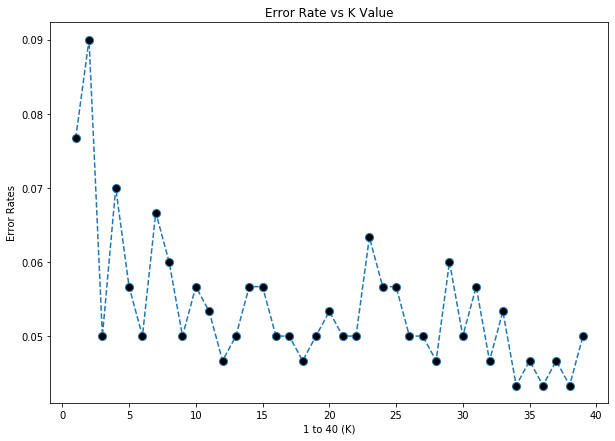

In [40]:
plt.figure(figsize=(10,7))
plt.plot(range(1,40), error_rate, linestyle="--", marker="o", markersize=8, markerfacecolor="black")
plt.title("Error Rate vs K Value")
plt.xlabel("1 to 40 (K)")
plt.ylabel("Error Rates")

In [41]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions=knn.predict(X_test)

print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[154   5]
 [ 12 129]]


              precision    recall  f1-score   support

           0       0.93      0.97      0.95       159
           1       0.96      0.91      0.94       141

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [42]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
predictions=knn.predict(X_test)

print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[151   8]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       159
           1       0.94      0.94      0.94       141

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [43]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
predictions=knn.predict(X_test)

print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[153   6]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [44]:
knn=KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train, y_train)
predictions=knn.predict(X_test)

print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[153   6]
 [  7 134]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

